### Titanic Survival Prediction

In [1]:
#importing necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
#loading the dataset
df = pd.read_csv('train.csv')
#printing first 15 rows of the dataset
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [3]:
# Number of rows and columns in the dataset
df.shape

(891, 12)

In [4]:
# getting some more insights
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [5]:
# counts of the survivors
# 0 --> Not Survived
# 1 --> Survived
survived = df['Survived'].value_counts()
survived

0    549
1    342
Name: Survived, dtype: int64

### Visualizing survivors on the basis of different columns

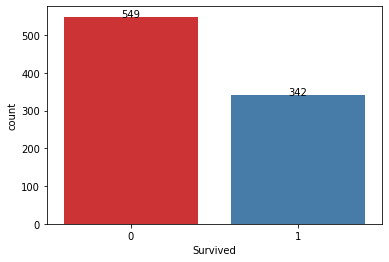

In [6]:
#using sns to visualize the survivors


graph = sns.countplot(x='Survived', data=df, palette='Set1')
i=0
for p in graph.patches:
    height = p.get_height()
    width = p.get_width()
    graph.text(p.get_x()+width/2, height, survived[i],ha='center')
    i+=1
plt.show()

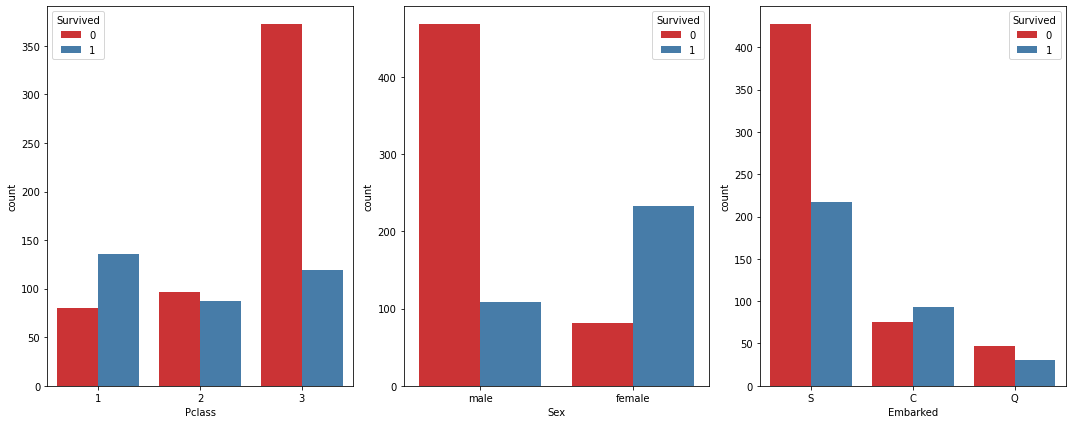

In [7]:
# survivors based on different columns
columns = ['Pclass', 'Sex', 'Embarked']
f, axes = plt.subplots(1,3,figsize=(15,6))
i=0
for column in columns:
    sns.countplot(df[column], hue=df['Survived'], palette='Set1',ax=axes[i])
    i+=1
plt.tight_layout()

### Survival rate on the basis of gender

In [8]:
# survival rate by sex
df['Survived'].groupby(df['Sex']).mean()
# it shows the proportion of passengers survived based on gender

Sex
female    0.742038
male      0.188908
Name: Survived, dtype: float64

In [9]:
df.pivot_table('Survived', index='Sex', columns='Pclass')

Pclass,1,2,3
Sex,,,
female,0.968085,0.921053,0.500000
male,0.368852,0.157407,0.135447


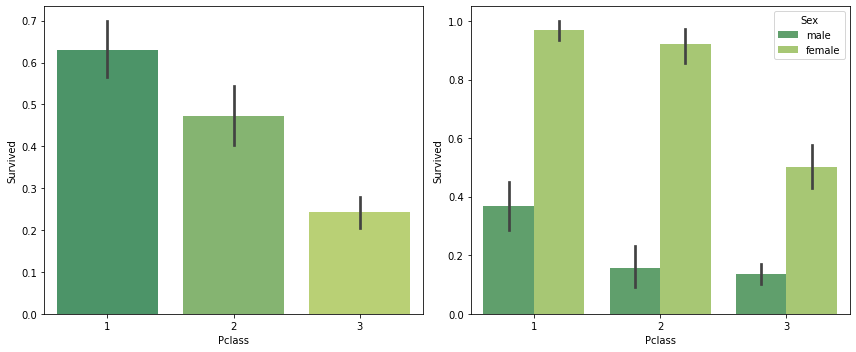

In [10]:
f, axes = plt.subplots(1,2, figsize=(12,5))
sns.barplot(x='Pclass', y='Survived', data=df, palette='summer', ax=axes[0])
sns.barplot(x='Pclass', y='Survived', hue='Sex', data=df, palette='summer', ax=axes[1])
plt.tight_layout()

In [11]:
age = pd.cut(df['Age'],[0,18,40,80])
age

0      (18.0, 40.0]
1      (18.0, 40.0]
2      (18.0, 40.0]
3      (18.0, 40.0]
4      (18.0, 40.0]
           ...     
886    (18.0, 40.0]
887    (18.0, 40.0]
888             NaN
889    (18.0, 40.0]
890    (18.0, 40.0]
Name: Age, Length: 891, dtype: category
Categories (3, interval[int64]): [(0, 18] < (18, 40] < (40, 80]]

In [12]:
df.pivot_table('Survived', index=['Sex',age], columns='Pclass')

Pclass                  1         2         3
Sex    Age                                   
female (0, 18]   0.909091  1.000000  0.511628
       (18, 40]  0.979167  0.914894  0.480000
       (40, 80]  0.961538  0.846154  0.111111
male   (0, 18]   0.800000  0.600000  0.215686
       (18, 40]  0.478261  0.063492  0.146199
       (40, 80]  0.280000  0.095238  0.064516

### Price for different class

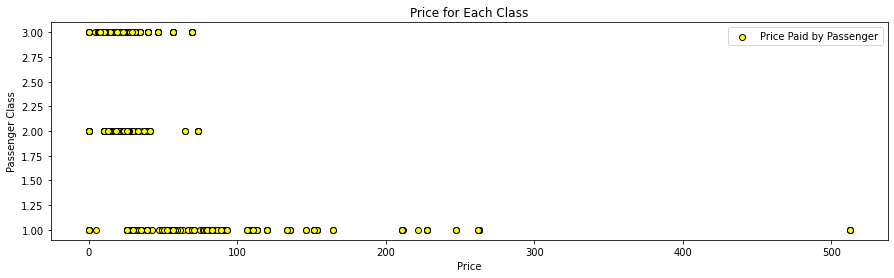

In [13]:
plt.figure(figsize=(15,4))
plt.scatter(df['Fare'], df['Pclass'], color='yellow', edgecolors='k', label='Price Paid by Passenger')
plt.xlabel('Price')
plt.ylabel('Passenger Class')
plt.title('Price for Each Class')
plt.legend()
plt.show()

### Empty rows in each column

In [14]:
df.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [15]:
for column in df.drop('PassengerId', axis=1):
    print(df[column].value_counts(),'\n')

0    549
1    342
Name: Survived, dtype: int64 

3    491
1    216
2    184
Name: Pclass, dtype: int64 

Frauenthal, Mrs. Henry William (Clara Heinsheimer)        1
Sage, Mr. Douglas Bullen                                  1
Baclini, Miss. Marie Catherine                            1
Moor, Mrs. (Beila)                                        1
Pekoniemi, Mr. Edvard                                     1
                                                         ..
Danbom, Mrs. Ernst Gilbert (Anna Sigrid Maria Brogren)    1
Watt, Mrs. James (Elizabeth "Bessie" Inglis Milne)        1
Jensen, Mr. Niels Peder                                   1
Colley, Mr. Edward Pomeroy                                1
Collyer, Mr. Harvey                                       1
Name: Name, Length: 891, dtype: int64 

male      577
female    314
Name: Sex, dtype: int64 

24.00    30
22.00    27
18.00    26
19.00    25
30.00    25
         ..
55.50     1
70.50     1
66.00     1
23.50     1
0.42      1
Name: Age

In [16]:
#dropping the Cabin column as 177 rows are empty
df.drop(['Cabin'], axis=1, inplace=True)

# dropping the rows containing Nan in Embarked column (2 rows)
df.dropna(subset=['Embarked'], axis=0, inplace=True)

df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S
...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C


In [17]:
df['Title'] = df['Name'].str.split('.').str[0].str.split(',').str[1]
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,Mr
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,Mrs
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,Miss
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,Mrs
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,Mr
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,S,Rev
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,S,Miss
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,S,Miss
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C,Mr


In [18]:
df.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Embarked         0
Title            0
dtype: int64

### Replacing the missing age with mean age based on the title

In [19]:
df['Title'].value_counts()

 Mr              517
 Miss            181
 Mrs             124
 Master           40
 Dr                7
 Rev               6
 Col               2
 Major             2
 Mlle              2
 the Countess      1
 Lady              1
 Don               1
 Ms                1
 Sir               1
 Mme               1
 Jonkheer          1
 Capt              1
Name: Title, dtype: int64

In [20]:
# Calculating mean age for different titles
mean_ages = df['Age'].groupby(df['Title']).mean()
mean_ages.to_dict()

{' Capt': 70.0,
 ' Col': 58.0,
 ' Don': 40.0,
 ' Dr': 42.0,
 ' Jonkheer': 38.0,
 ' Lady': 48.0,
 ' Major': 48.5,
 ' Master': 4.574166666666667,
 ' Miss': 21.662068965517243,
 ' Mlle': 24.0,
 ' Mme': 24.0,
 ' Mr': 32.368090452261306,
 ' Mrs': 35.654205607476634,
 ' Ms': 28.0,
 ' Rev': 43.166666666666664,
 ' Sir': 49.0,
 ' the Countess': 33.0}

In [21]:
# creating a new list by replacing nan by mean age for the corresponding title
Age_new=[]
for age, title in zip(df.Age, df.Title):
    if str(age)=='nan':
        Age_new.append(round(mean_ages[title]))
    else:
        Age_new.append(age)

In [22]:
df['Age_new'] = Age_new
df.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Title,Age_new
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,Mr,22.0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,Mrs,38.0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,Miss,26.0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,Mrs,35.0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,Mr,35.0
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,Q,Mr,32.0
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,S,Mr,54.0
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,S,Master,2.0
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,S,Mrs,27.0
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,C,Mrs,14.0


In [23]:
# Looking at the mean age before and after filling the nans
print('Mean age of the whole data set before', df.Age.mean())
print('Mean age of the whole data set after filling nans',df.Age_new.mean())

Mean age of the whole data set before 29.64209269662921
Mean age of the whole data set after filling nans 29.67285714285714


In [24]:
# dropping the old Age column and checking for Nan
df.drop(['Age'], axis=1,inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 889 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  889 non-null    int64  
 1   Survived     889 non-null    int64  
 2   Pclass       889 non-null    int64  
 3   Name         889 non-null    object 
 4   Sex          889 non-null    object 
 5   SibSp        889 non-null    int64  
 6   Parch        889 non-null    int64  
 7   Ticket       889 non-null    object 
 8   Fare         889 non-null    float64
 9   Embarked     889 non-null    object 
 10  Title        889 non-null    object 
 11  Age_new      889 non-null    float64
dtypes: float64(2), int64(5), object(5)
memory usage: 130.3+ KB


In [25]:
#checking for datatypes
df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Embarked        object
Title           object
Age_new        float64
dtype: object

In [26]:
# unique values in Sex and Embarked columns before encoding

print(df['Sex'].unique())
print(df['Embarked'].unique())

['male' 'female']
['S' 'C' 'Q']


In [27]:
from sklearn.preprocessing import LabelEncoder
lab_enc = LabelEncoder()
# df.iloc[:,4] = lab_enc.fit_transform(df.iloc[:,4])
# or
df['Sex'] = lab_enc.fit_transform(df['Sex'])
df['Embarked'] = lab_enc.fit_transform(df['Embarked'])

In [28]:
# Encoded values in Sex and Embarked columns

print(df['Sex'].unique())
print(df['Embarked'].unique())

[1 0]
[2 0 1]


#### Male is encoded as 1 and Female is encoded as 0.
#### In Embarked; C=0, Q=1, S=2

In [29]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,SibSp,Parch,Ticket,Fare,Embarked,Title,Age_new
0,1,0,3,"Braund, Mr. Owen Harris",1,1,0,A/5 21171,7.2500,2,Mr,22.0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,1,0,PC 17599,71.2833,0,Mrs,38.0
2,3,1,3,"Heikkinen, Miss. Laina",0,0,0,STON/O2. 3101282,7.9250,2,Miss,26.0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,1,0,113803,53.1000,2,Mrs,35.0
4,5,0,3,"Allen, Mr. William Henry",1,0,0,373450,8.0500,2,Mr,35.0


In [30]:
# creating a new data set
df_num = df.drop(['PassengerId','Name', 'Ticket', 'Title'], axis=1)
df_num.head(10)

,Survived,Pclass,Sex,SibSp,Parch,Fare,Embarked,Age_new
0,0,3,1,1,0,7.2500,2,22.0
1,1,1,0,1,0,71.2833,0,38.0
2,1,3,0,0,0,7.9250,2,26.0
3,1,1,0,1,0,53.1000,2,35.0
4,0,3,1,0,0,8.0500,2,35.0
5,0,3,1,0,0,8.4583,1,32.0
6,0,1,1,0,0,51.8625,2,54.0
7,0,3,1,3,1,21.0750,2,2.0
8,1,3,0,0,2,11.1333,2,27.0
9,1,2,0,1,0,30.0708,0,14.0


In [31]:
df_num.dtypes

Survived      int64
Pclass        int64
Sex           int64
SibSp         int64
Parch         int64
Fare        float64
Embarked      int64
Age_new     float64
dtype: object

### Creating two variables X and y (dependent and independent)

In [32]:
X = df_num.iloc[:,1:].values
y = df_num.iloc[:,0].values

In [33]:
# Spliting the data into training (80%) and testing (20%) sample 
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.2,random_state=420)

In [34]:
# precrocessing the data using standard scalar (Scaling)
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)

### Using multiple machine learnig models using a function

In [35]:
def models(X_train, y_train):
    
    # Logistic Regression
    from sklearn.linear_model import LogisticRegression
    lr = LogisticRegression(random_state=420)
    lr.fit(X_train, y_train)
    
    # KNN
    from sklearn.neighbors import KNeighborsClassifier
    knn = KNeighborsClassifier(n_neighbors=5, metric='minkowski', p=2)
    knn.fit(X_train, y_train)
    
    # SVM (linear kernel)
    from sklearn.svm import SVC
    svc_lin = SVC(kernel='linear', random_state=420)
    svc_lin.fit(X_train, y_train)
    
    # SVM (rbf kernel)
    from sklearn.svm import SVC
    svc_rbf = SVC(kernel='rbf', random_state=420)
    svc_rbf.fit(X_train, y_train)
    
    # Gaussian Naive Bayes
    from sklearn.naive_bayes import GaussianNB
    gauss = GaussianNB()
    gauss.fit(X_train, y_train)
    
    # Decision tree classifier
    from sklearn.tree import DecisionTreeClassifier
    dtc = DecisionTreeClassifier(criterion='entropy', random_state=420)
    dtc.fit(X_train, y_train)
    
    # Random Forest Classifier
    from sklearn.ensemble import RandomForestClassifier
    rfc = RandomForestClassifier(n_estimators=20, criterion='entropy', random_state=420)
    rfc.fit(X_train, y_train)
    
    # Printing training accuracy for each model
    print('Training accuracy for logistic regression = ', lr.score(X_train, y_train))
    print('Training accuracy for KNN = ', knn.score(X_train, y_train))
    print('Training accuracy for SVC(Linear) = ', svc_lin.score(X_train, y_train))
    print('Training accuracy for SVC(rbf) = ', svc_rbf.score(X_train, y_train))
    print('Training accuracy for Gaussian Naive Bayes = ', gauss.score(X_train, y_train))
    print('Training accuracy for Decision Tree Classifier = ', dtc.score(X_train, y_train))
    print('Training accuracy for Random Forest Classifier = ', rfc.score(X_train, y_train))
    
    return lr, knn, svc_lin, svc_rbf, gauss, dtc, rfc

In [36]:
model = models(X_train, y_train)

Training accuracy for logistic regression =  0.8129395218002813
Training accuracy for KNN =  0.8593530239099859
Training accuracy for SVC(Linear) =  0.7932489451476793
Training accuracy for SVC(rbf) =  0.8382559774964838
Training accuracy for Gaussian Naive Bayes =  0.8059071729957806
Training accuracy for Decision Tree Classifier =  0.9845288326300985
Training accuracy for Random Forest Classifier =  0.9760900140646976


##### Confusion matrices for test data for all the models

In [37]:
from sklearn.metrics import confusion_matrix

for mod in model:
    cm = confusion_matrix(y_test, mod.predict(X_test))
    tn, fp, fn, tp = cm.ravel()
    
    test_score = (tp+tn)/(tn+tp+fn+fp)
    
    print(cm)
    print('{} \n Testing Accuracy = {}'.format(mod,test_score))
    print()

[[89 27]
 [21 41]]
LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=420, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False) 
 Testing Accuracy = 0.7303370786516854

[[99 17]
 [19 43]]
KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform') 
 Testing Accuracy = 0.797752808988764

[[95 21]
 [22 40]]
SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=False, random_state=420, shrinking=True, tol=0.001,
    verbose=False) 
 Testing Accuracy = 0.7584269662921348

[[99 17]
 [18 44]]
SVC(C=1.0, break_ties=False, cache_siz

#### Both SVC(rbf) and RFC have good testing accuracy

In [38]:
# extracting feature importances using RFC model
rfc = model[-1]

features=df_num.iloc[:,1:].columns
importances = rfc.feature_importances_

feat_imp = pd.DataFrame({'Feature':features, 'Importance':importances})
feat_imp = feat_imp.sort_values('Importance', ascending=False).set_index('Feature')
feat_imp

,Importance
Feature,
Age_new,0.280800
Fare,0.274405
Sex,0.229372
Pclass,0.081642
SibSp,0.049738
Parch,0.042451
Embarked,0.041592


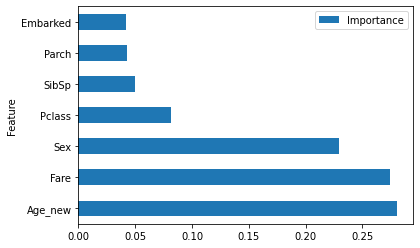

In [39]:
feat_imp.plot.barh()
plt.show()

In [40]:
# printing the predictions of the Random Forest Classifier along with the actual values
pred = rfc.predict(X_test)
print(pred,'\n')

print(y_test)

[0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 1 0 0 0 0
 0 0 0 0 1 0 0 0 0 0 0 0 0 1 1 0 1 0 0 1 0 1 0 1 0 0 0 0 1 1 0 1 0 0 0 0 0
 0 0 0 0 1 0 1 0 0 0 0 0 0 1 0 0 0 0 0 1 1 0 0 1 1 0 0 1 1 0 0 1 0 0 1 0 0
 1 0 1 0 0 1 1 0 1 0 0 1 0 0 1 1 1 0 0 1 1 1 0 1 0 0 0 1 0 1 1 1 0 0 0 0 0
 0 0 0 1 0 1 0 1 1 0 0 1 1 0 1 0 0 0 0 0 0 0 1 0 0 0 1 0 0 1] 

[0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 1 0 0 0 1 1 0 0 0 0 0 1 0 0 1 0 0 0 1
 0 1 1 1 0 0 0 0 0 0 1 0 0 1 1 0 1 0 0 0 0 1 0 0 0 1 0 1 1 0 1 1 0 0 0 1 0
 0 0 0 0 1 0 1 1 0 0 1 0 1 1 0 0 0 0 0 1 1 0 0 1 1 0 0 1 1 1 0 0 0 0 1 0 0
 1 0 1 0 0 1 0 0 0 0 1 0 0 0 1 1 1 0 0 1 1 1 0 1 1 1 0 0 0 1 1 1 0 0 1 1 0
 0 0 0 1 0 1 0 1 0 0 0 1 1 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0]


In [42]:
# Checking if I would survive or not
# Pclass
# Sex
# SibSp
# Parch
# Fare
# Embarked
# Age_new
my_survival = [[1,0,2,2,50,2,26]]
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
my_survival_scaled = sc.fit_transform(my_survival)

pred = rfc.predict(my_survival_scaled)
print(pred)

if pred == 0:
    print('Hasta La Vista, Baby!!!')
else:
    print('Not Today! You are safe.')

[0]
Hasta La Vista, Baby!!!
